<a href="https://colab.research.google.com/github/jgraving/deepposekit/blob/master/examples/step1_create_annotation_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Access files from Google Cloud Storage

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls "drive/My Drive/NLP"

 data/               N-gram.ipynb                 zemberek-full.jar
 Female_Male.ipynb  'NLP_en_Cleaning&BOW.ipynb'   zemberek.ipynb


## Installations

In [4]:
!pip install nltk

In [5]:
import nltk

In [6]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [7]:
from nltk import word_tokenize, sent_tokenize

## Tokenization

In [8]:
sent = "Son dakika korona virüs haberleri yanı sıra korona virüs ün canlı haritası da burada. İşte güncel korona virüs ile ilgili son dakika haberleri ve korona virüste son durum! Yeni Koronavirüs Hastalığı için Alınacak Önlemler, Koronavirüs Belirtileri, Koronavirüs hakkında Resmi Bilgilendirme ,Koronavirüs Hakkında Aradığınız Tüm Bilgiler. Salgın Yönetimi Rehberi. Tanı ve Tedavi Rehberi. Genel Koronavirüs Tablosu. Covid-19'un insan vücudu üzerindeki etkileri neler? Koronavirüs tedavisi, En başarılı ilaçlar ve yöntemler hangileri? Koronavirüs aşısı çalışmaları hangi aşamada? Türkiyedeki illere göre Koronavirüs Tablosu"
sent=sent.lower()
kelime= word_tokenize(sent)
cumle= sent_tokenize(sent)
print(kelime)
print(cumle)

print("Kelime sayısı {0}".format(len(kelime)))
print("Kelime sayısı {0}".format(len(cumle)))



['son', 'dakika', 'korona', 'virüs', 'haberleri', 'yanı', 'sıra', 'korona', 'virüs', 'ün', 'canlı', 'haritası', 'da', 'burada', '.', 'i̇şte', 'güncel', 'korona', 'virüs', 'ile', 'ilgili', 'son', 'dakika', 'haberleri', 've', 'korona', 'virüste', 'son', 'durum', '!', 'yeni', 'koronavirüs', 'hastalığı', 'için', 'alınacak', 'önlemler', ',', 'koronavirüs', 'belirtileri', ',', 'koronavirüs', 'hakkında', 'resmi', 'bilgilendirme', ',', 'koronavirüs', 'hakkında', 'aradığınız', 'tüm', 'bilgiler', '.', 'salgın', 'yönetimi', 'rehberi', '.', 'tanı', 've', 'tedavi', 'rehberi', '.', 'genel', 'koronavirüs', 'tablosu', '.', "covid-19'un", 'insan', 'vücudu', 'üzerindeki', 'etkileri', 'neler', '?', 'koronavirüs', 'tedavisi', ',', 'en', 'başarılı', 'ilaçlar', 've', 'yöntemler', 'hangileri', '?', 'koronavirüs', 'aşısı', 'çalışmaları', 'hangi', 'aşamada', '?', 'türkiyedeki', 'illere', 'göre', 'koronavirüs', 'tablosu']
['son dakika korona virüs haberleri yanı sıra korona virüs ün canlı haritası da burada.', 

## Stop Words

In [9]:
from nltk.corpus import stopwords        
                                                          
stop_words = stopwords.words('turkish')  
                                         
                                         
token = word_tokenize(sent)
cleaned_token = []
for word in token:
    if word not in stop_words:
        cleaned_token.append(word)
print("Stop Word'leri cümleden çıkarma işlemi başlıyor...")
print("{} kelimelik ilk hali: {}".format(len(kelime),token))
print("{} kelimelik son hali: {}".format(len(cleaned_token),cleaned_token) )



Stop Word'leri cümleden çıkarma işlemi başlıyor...
92 kelimelik ilk hali: ['son', 'dakika', 'korona', 'virüs', 'haberleri', 'yanı', 'sıra', 'korona', 'virüs', 'ün', 'canlı', 'haritası', 'da', 'burada', '.', 'i̇şte', 'güncel', 'korona', 'virüs', 'ile', 'ilgili', 'son', 'dakika', 'haberleri', 've', 'korona', 'virüste', 'son', 'durum', '!', 'yeni', 'koronavirüs', 'hastalığı', 'için', 'alınacak', 'önlemler', ',', 'koronavirüs', 'belirtileri', ',', 'koronavirüs', 'hakkında', 'resmi', 'bilgilendirme', ',', 'koronavirüs', 'hakkında', 'aradığınız', 'tüm', 'bilgiler', '.', 'salgın', 'yönetimi', 'rehberi', '.', 'tanı', 've', 'tedavi', 'rehberi', '.', 'genel', 'koronavirüs', 'tablosu', '.', "covid-19'un", 'insan', 'vücudu', 'üzerindeki', 'etkileri', 'neler', '?', 'koronavirüs', 'tedavisi', ',', 'en', 'başarılı', 'ilaçlar', 've', 'yöntemler', 'hangileri', '?', 'koronavirüs', 'aşısı', 'çalışmaları', 'hangi', 'aşamada', '?', 'türkiyedeki', 'illere', 'göre', 'koronavirüs', 'tablosu']
84 kelimelik son

### Basic Method for cleaning

In [10]:
import re

def basic_clean(text):
 
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('turkish')
  text = text.lower()
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

clean_data= basic_clean(sent)

In [11]:
clean_data

['son',
 'dakika',
 'korona',
 'virüs',
 'haberleri',
 'yanı',
 'sıra',
 'korona',
 'virüs',
 'ün',
 'canlı',
 'haritası',
 'burada',
 'işte',
 'güncel',
 'korona',
 'virüs',
 'ilgili',
 'son',
 'dakika',
 'haberleri',
 'korona',
 'virüste',
 'son',
 'durum',
 'yeni',
 'koronavirüs',
 'hastalığı',
 'alınacak',
 'önlemler',
 'koronavirüs',
 'belirtileri',
 'koronavirüs',
 'hakkında',
 'resmi',
 'bilgilendirme',
 'koronavirüs',
 'hakkında',
 'aradığınız',
 'bilgiler',
 'salgın',
 'yönetimi',
 'rehberi',
 'tanı',
 'tedavi',
 'rehberi',
 'genel',
 'koronavirüs',
 'tablosu',
 'covid19un',
 'insan',
 'vücudu',
 'üzerindeki',
 'etkileri',
 'neler',
 'koronavirüs',
 'tedavisi',
 'başarılı',
 'ilaçlar',
 'yöntemler',
 'hangileri',
 'koronavirüs',
 'aşısı',
 'çalışmaları',
 'hangi',
 'aşamada',
 'türkiyedeki',
 'illere',
 'göre',
 'koronavirüs',
 'tablosu']

## N-Gram

In [12]:
import pandas as pd
(pd.Series(nltk.ngrams(clean_data, 2)).value_counts())[:10]

(korona, virüs)            3
(koronavirüs, hakkında)    2
(son, dakika)              2
(koronavirüs, tablosu)     2
(dakika, korona)           1
(hakkında, resmi)          1
(korona, virüste)          1
(tanı, tedavi)             1
(virüste, son)             1
(tedavi, rehberi)          1
dtype: int64

In [17]:
!pip install wordcloud

## Word Cloud

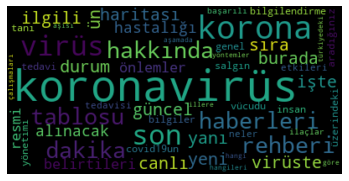

In [18]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(' '.join(clean_data))    

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


 A Simple and Clear Explanation of N-gram [here](https://coimer.medium.com/n-gram-516db5f0672c)